<a href="https://colab.research.google.com/github/ailijevski/BlueReefModel/blob/main/AIModelPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coral Reef Health Analysis

By: 

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from google.colab import drive
import pandas as pd
import datetime as dt
import numpy as np
import sklearn
from sklearn import feature_selection
from joblib import load, dump
import statistics
%matplotlib inline

## Import the data into Pandas Dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- What are the number of instances/samples in the DataFrame?
- How many missing instances are there in the DataFrame? Which features are missing instances?

In [ ]:
# reading in weather dataset
drive.mount('/content/drive')
d = pd.read_csv('/content/drive/My Drive/Colab Notebooks/coralreef.csv')
df = pd.DataFrame(data=d)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# finding number of data points & samples
print("The number of datapoints is", df.size)
print("The number of samples is", df.shape[0])

The number of datapoints is 2193
The number of samples is 51


In [ ]:
df.head()

,EXPOCODE,CRUISE_ID,STATION_ID,CAST_NUMBER,SAMPLE_ID,YEAR_UTC,MONTH_UTC,DAY_UTC,TIME_UTC,YEARDAY_UTC,...,SURVEY_DESIGN,SAMPLE_FREQUENCY,TEMPERATURE_ITS90_BEST,TEMPERATURE_ITS90_BEST_ORIGIN,SALINITY_PSS78_BEST,SALINITY_PSS78_BEST_ORIGIN,PH_TS_CALCULATED,PCO2_UATM_CALCULATED,ARAGONITE_SAT,TIMESTAMP_UTC
0,NaN,CTI 2013 TIM,VIL-03,1,3804,2013,6,6,00:31:00,157.02,...,Permanent,Single,28.71280,CTD,32.946,Bottle,8.043854,382.629756,3.542726,2013-06-06 00:31:00
1,NaN,CTI 2013 TIM,VIL-03,1,3805,2013,6,6,00:31:00,157.02,...,Permanent,Single,28.71280,CTD,33.051,Bottle,8.029130,396.994249,3.444215,2013-06-06 00:31:00
2,NaN,CTI 2013 TIM,TIM-110,1,3806,2013,6,6,00:54:00,157.04,...,Random,Single,28.51006,CTD,32.879,Bottle,8.056669,368.421274,3.586775,2013-06-06 00:54:00
3,NaN,CTI 2013 TIM,VIL-10,1,3807,2013,6,6,22:36:00,157.94,...,Permanent,Single,28.67146,CTD,32.953,Bottle,8.031010,396.895760,3.459103,2013-06-06 22:36:00
4,NaN,CTI 2013 TIM,VIL-10,1,3808,2013,6,6,22:36:00,157.94,...,Permanent,Single,28.67146,CTD,32.959,Bottle,8.018683,409.801148,3.376303,2013-06-06 22:36:00


In [ ]:
# finding sum of missing instances for each column (feature) in dataframe
print('Below is a summary of which features contain missing instances: \n')
df.isna().sum()

Below is a summary of which features contain missing instances: 



EXPOCODE                         51
CRUISE_ID                         0
STATION_ID                        0
CAST_NUMBER                       0
SAMPLE_ID                         0
YEAR_UTC                          0
MONTH_UTC                         0
DAY_UTC                           0
TIME_UTC                          0
YEARDAY_UTC                       0
LATITUDE_DEC                      0
LONGITUDE_DEC                     0
PRESSURE_DB_CTD                  41
PRESSURE_DB_CALCULATED           10
DEPTH_METER                       0
TEMPERATURE_ITS90_CTD             9
TEMPERATURE_ITS90_CTD_FLAG        9
TEMPERATURE_ITS90_SCS            51
SALINITY_PSS78_CTD               51
SALINITY_PSS78_CTD_FLAG          51
SALINITY_PSS78_BOTTLE             0
SALINITY_PSS78_BOTTLE_FLAG        0
SALINITY_PSS78_SCS               51
DIC_UMOL_KG                       0
DIC_UMOL_KG_FLAG                  0
TALK_UMOL_KG                      0
TALK_UMOL_KG_FLAG                 0
CTDCASTID_ESD               

In [ ]:
df.head()

,EXPOCODE,CRUISE_ID,STATION_ID,CAST_NUMBER,SAMPLE_ID,YEAR_UTC,MONTH_UTC,DAY_UTC,TIME_UTC,YEARDAY_UTC,...,SURVEY_DESIGN,SAMPLE_FREQUENCY,TEMPERATURE_ITS90_BEST,TEMPERATURE_ITS90_BEST_ORIGIN,SALINITY_PSS78_BEST,SALINITY_PSS78_BEST_ORIGIN,PH_TS_CALCULATED,PCO2_UATM_CALCULATED,ARAGONITE_SAT,TIMESTAMP_UTC
0,NaN,CTI 2013 TIM,VIL-03,1,3804,2013,6,6,00:31:00,157.02,...,Permanent,Single,28.71280,CTD,32.946,Bottle,8.043854,382.629756,3.542726,2013-06-06 00:31:00
1,NaN,CTI 2013 TIM,VIL-03,1,3805,2013,6,6,00:31:00,157.02,...,Permanent,Single,28.71280,CTD,33.051,Bottle,8.029130,396.994249,3.444215,2013-06-06 00:31:00
2,NaN,CTI 2013 TIM,TIM-110,1,3806,2013,6,6,00:54:00,157.04,...,Random,Single,28.51006,CTD,32.879,Bottle,8.056669,368.421274,3.586775,2013-06-06 00:54:00
3,NaN,CTI 2013 TIM,VIL-10,1,3807,2013,6,6,22:36:00,157.94,...,Permanent,Single,28.67146,CTD,32.953,Bottle,8.031010,396.895760,3.459103,2013-06-06 22:36:00
4,NaN,CTI 2013 TIM,VIL-10,1,3808,2013,6,6,22:36:00,157.94,...,Permanent,Single,28.67146,CTD,32.959,Bottle,8.018683,409.801148,3.376303,2013-06-06 22:36:00


## Feature Engineering


## Examining Correlations
Investigate linear correlations between features and visualize the data.

In [ ]:
dfMod = df[['PH_TS_CALCULATED', 'DAY_UTC', 'LATITUDE_DEC', 'LONGITUDE_DEC', 'PRESSURE_DB_CALCULATED', 'DEPTH_METER', 'TEMPERATURE_ITS90_CTD', 'SALINITY_PSS78_BOTTLE', 'DIC_UMOL_KG', 'PCO2_UATM_CALCULATED']]
df = dfMod.dropna(axis=0)
df.isna().sum()

PH_TS_CALCULATED          0
DAY_UTC                   0
LATITUDE_DEC              0
LONGITUDE_DEC             0
PRESSURE_DB_CALCULATED    0
DEPTH_METER               0
TEMPERATURE_ITS90_CTD     0
SALINITY_PSS78_BOTTLE     0
DIC_UMOL_KG               0
PCO2_UATM_CALCULATED      0
dtype: int64

In [ ]:
# choosing features to examine
xAll = df[['DAY_UTC', 'LATITUDE_DEC', 'LONGITUDE_DEC', 'PRESSURE_DB_CALCULATED', 'DEPTH_METER', 'TEMPERATURE_ITS90_CTD', 'SALINITY_PSS78_BOTTLE', 'DIC_UMOL_KG', 'PCO2_UATM_CALCULATED']].to_numpy()
labels = ['Day', 'Latitude', 'Longitude', 'Pressure', 'Depth', 'Temperature', 'Salinity', 'Dissolved_Inorganic_Carbon', 'pCO2']
y = df['PH_TS_CALCULATED'].to_numpy()

In [ ]:
range = max(y)-min(y)
median = statistics.median(y)
stddev = statistics.stdev(y)
mean = statistics.mean(y)

print('Statistics on the pH values:')
print('Range:', range)
print('Median:', median)
print('Stdev:', stddev)
print('Mean:', mean)
print('Min:', min(y))
print('Max:', max(y))

Statistics on the pH values:
Range: 0.044039058865690706
Median: 8.043542325313915
Stdev: 0.011108546156756492
Mean: 8.04204563371384
Min: 8.0172048263972
Max: 8.06124388526289


## Creating Pairplots to demonstrate linear and non-linear correlations between features:

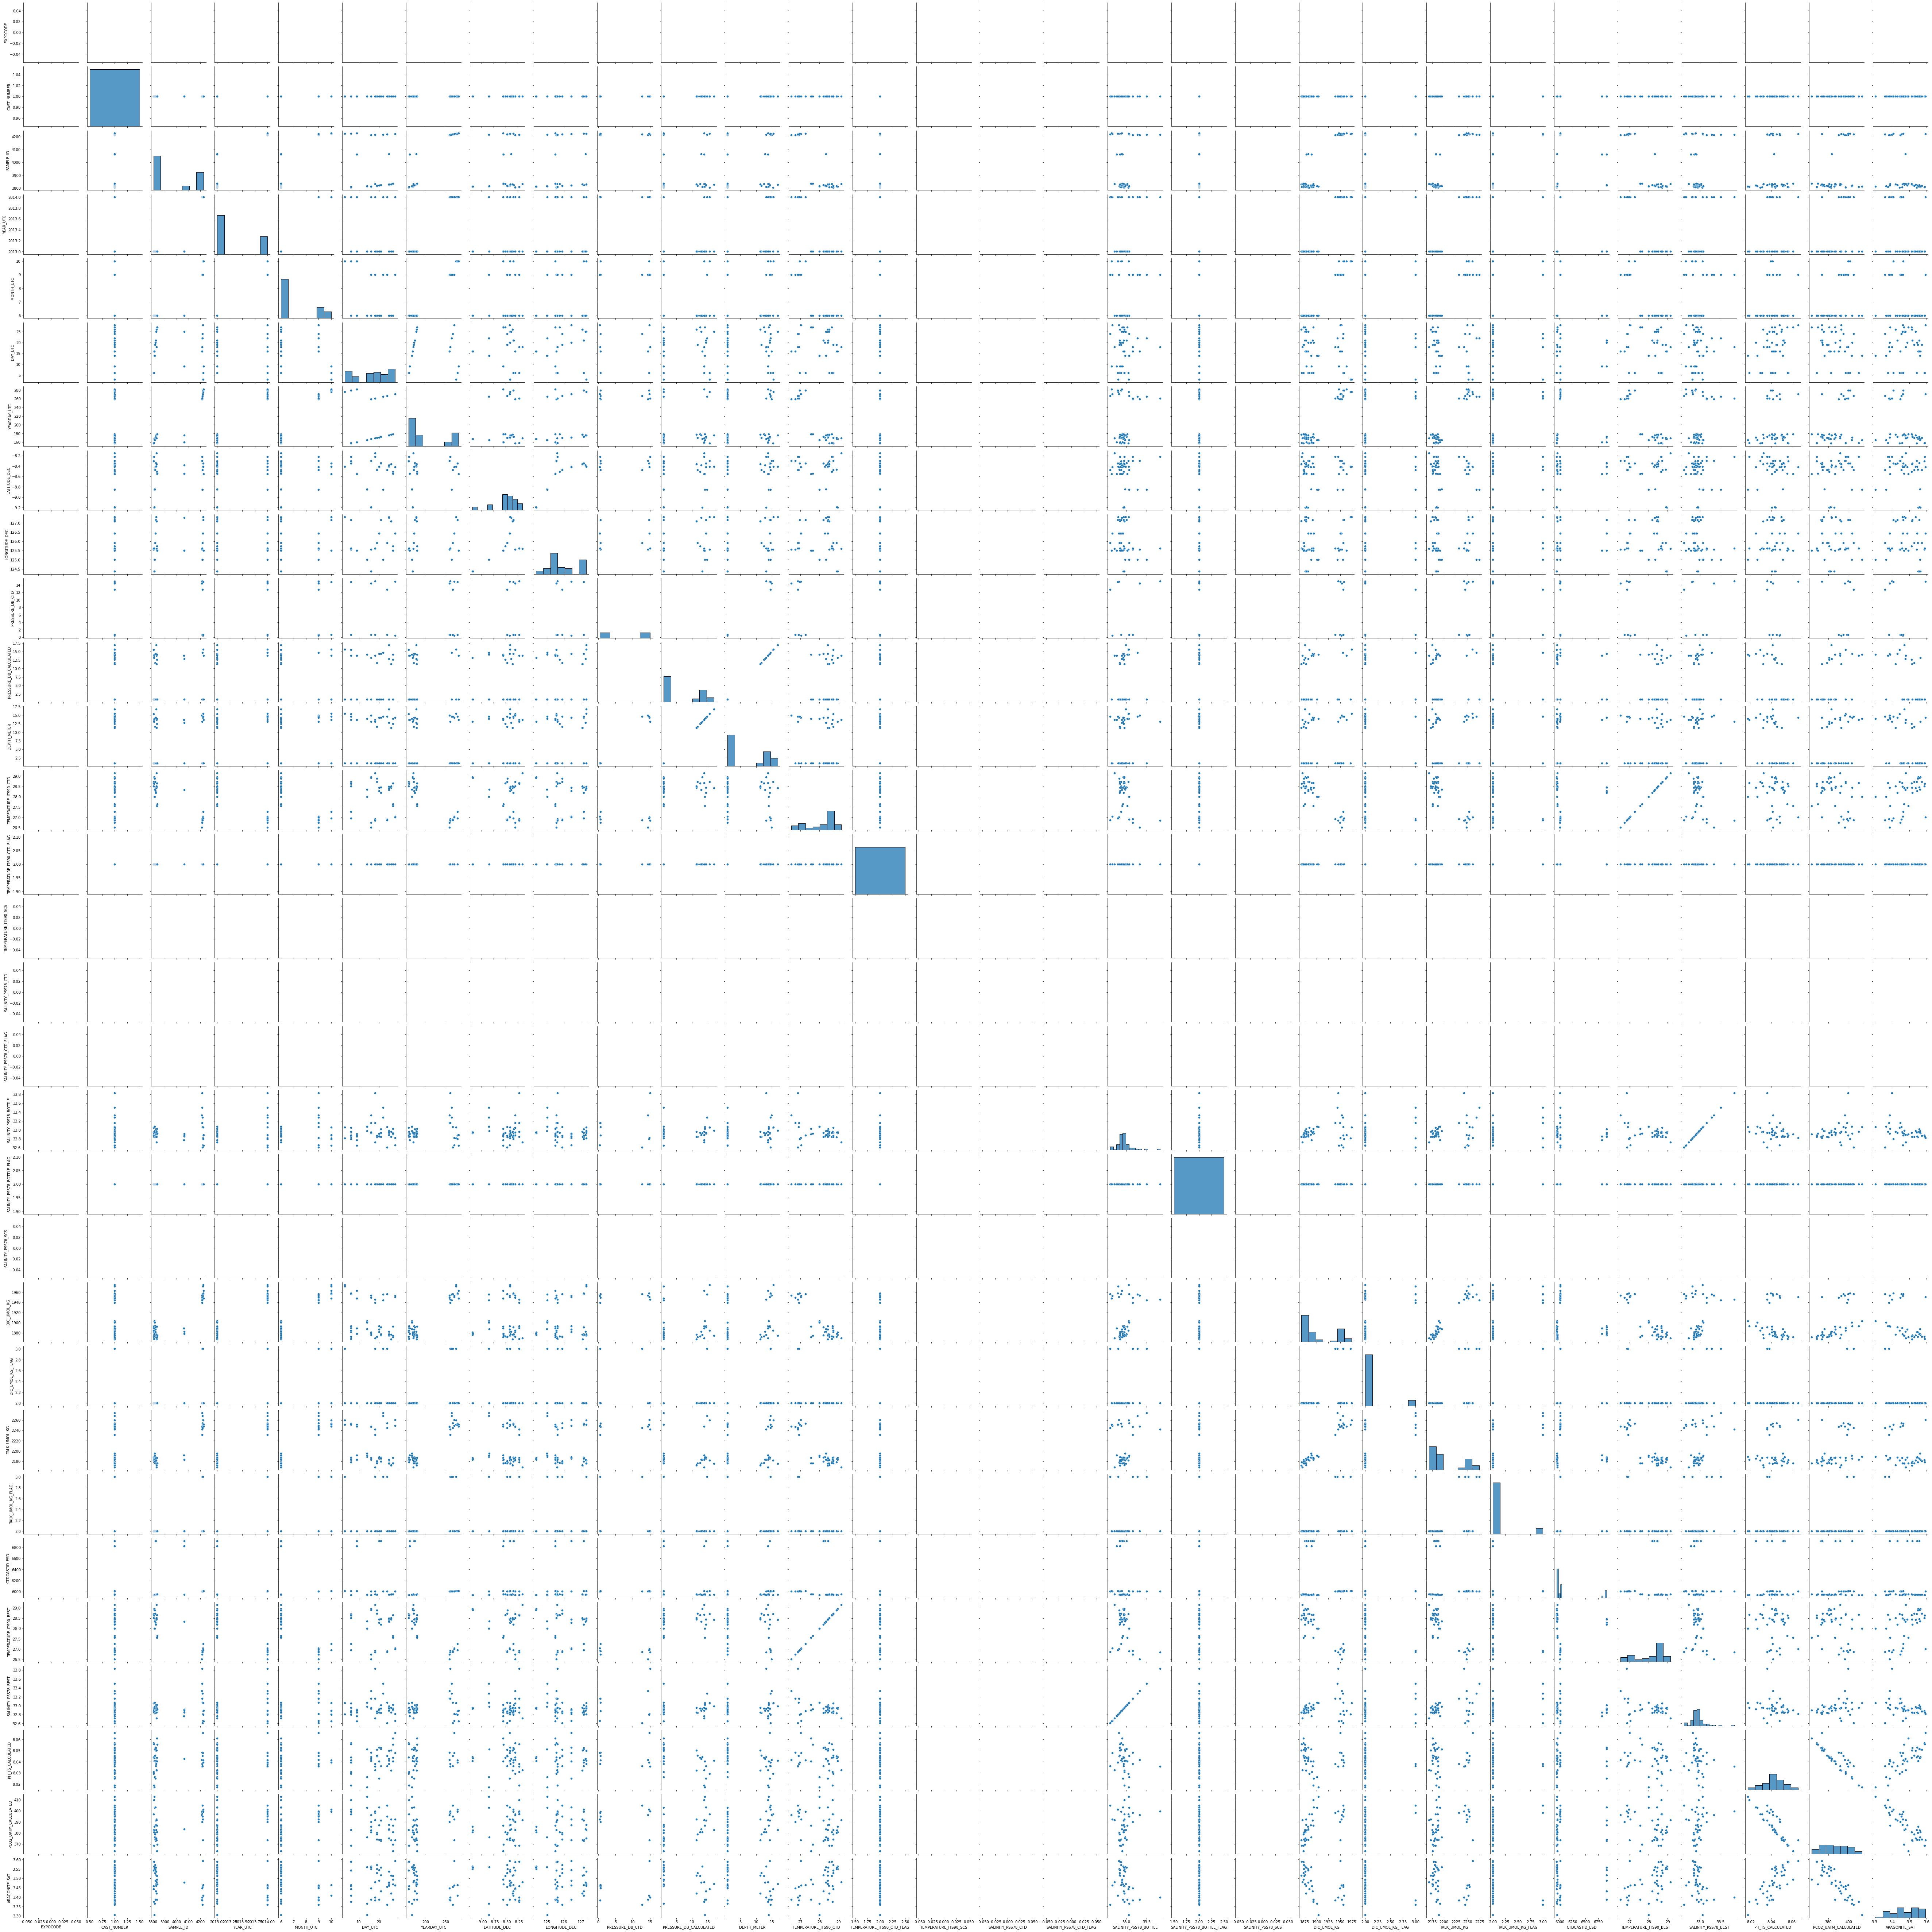

In [ ]:
# creating pairplot to examine correlations between features
# identifying any noticeable linear correlations
import seaborn as sns
from seaborn import pairplot
pairplot = sns.pairplot(df)

This seaborn pairplot shows the correlations between all features. In the sections below, we will investigate individual relationships between certain features to extract information about the dataset from these feature comparisons.

## Pearson Correlation Matrix

In [ ]:
# Pearson correlations with target y
xAll.reshape
featureDF = pd.DataFrame(feature_selection.r_regression(xAll,y), labels)
display(featureDF)

,0
Day,0.269908
Latitude,0.017123
Longitude,0.111417
Pressure,-0.544858
Depth,-0.544858
Temperature,-0.155031
Salinity,-0.414288
Dissolved_Inorganic_Carbon,-0.712308
pCO2,-0.994598


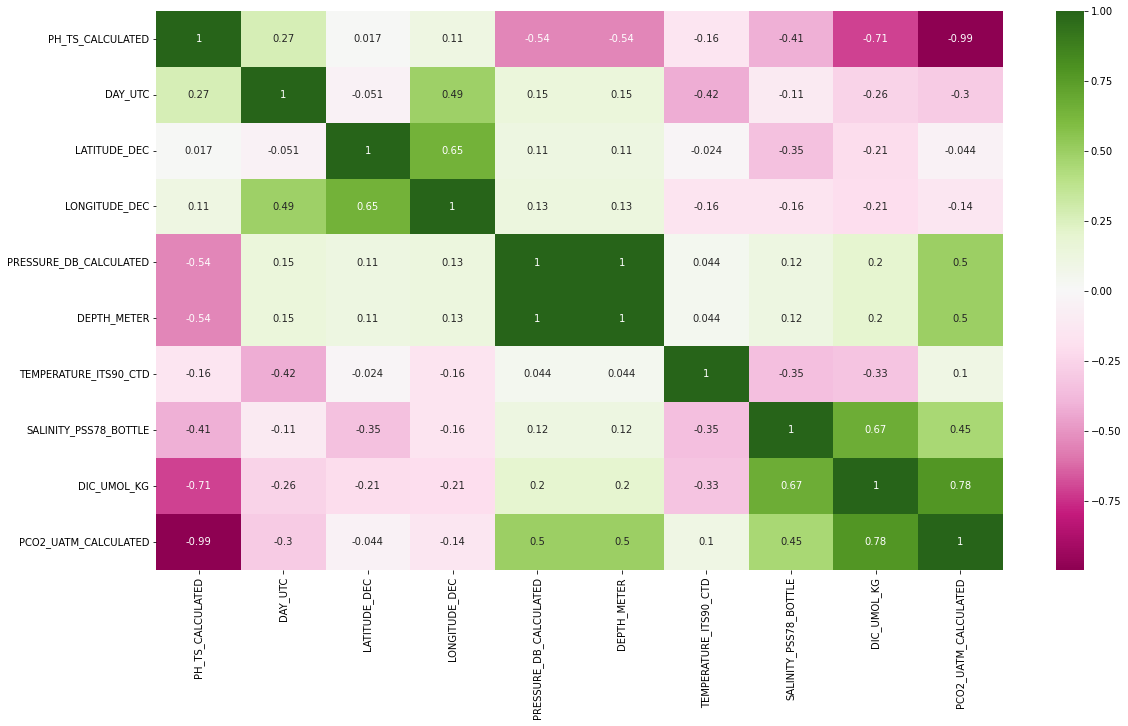

In [ ]:
# use R values (Pearson coefficients) to create heatmap to visualize correlations between features
plt.figure(figsize=(2*9.48,2*5.14))
pearsonPlot = sns.heatmap(df.corr(), cmap='PiYG', annot=True)
plt.savefig('PearsonPlot.png', dpi = 600)

## Test / Train Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
y = df[['PH_TS_CALCULATED']].to_numpy()
y.shape

# Note: There is no need to stratify when doing regression
Xtrain, Xtest, ytrain, ytest = train_test_split(xAll, y, test_size=0.2, random_state=42)

We decided to use an 80/20 test/train split since we will be using cross-validation for all of our models. This gives us roughly enough data to use for prediction purposes, but not too much so as to overfit the predictions/ test data.

In [ ]:
# import necessary tools
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## Scaling Features

In [ ]:
scaler = StandardScaler()
scaler.fit(Xtrain)
xTrainStd = scaler.transform(Xtrain)
xTestStd = scaler.transform(Xtest)

## We will now compare different supervised regression models. We will use Decision Trees, Random Forests, and K Nearest Neighbors. 

## **K-Nearest Neighbors Regressor**

We chose to try out a K Nearest Neighbors (KNN) Regressor for this dataset. KNN is a lazy learning algorithm and does not have a training step. KNN Regression averages the output among the K nearest neighbors. This will allow us to determine whether the K nearest neighbors model is robust and effective for the large number of samples in the weather dataset compared to other eager learning methods we will visit, such as the Decision Tree Regressor and Random Forest Regressor.

In [ ]:
# KNN Regressor
knn = KNeighborsRegressor(n_neighbors = 20)

# fitting the KNN model
knn.fit(xTrainStd, ytrain)
yPredKNN = knn.predict(xTestStd)

# using K-fold Cross Validation (CV)
cv_scores = cross_val_score(knn, xTrainStd, ytrain, cv = 5)
print("CV scores for KNN:", cv_scores)
print("Mean of CV scores:", cv_scores.mean())
print("\nR2 score:", r2_score(ytest, yPredKNN))
print("Stdev:", cv_scores.std())
print("MSE:", mean_squared_error(ytest, yPredKNN))
print("RMSE:", mean_squared_error(ytest, yPredKNN, squared = False))
print("MAE:", mean_absolute_error(ytest, yPredKNN))

CV scores for KNN: [-9.60147577e-01 -1.54505389e-01 -1.35130659e-05 -2.78712052e+00
 -4.46961680e-02]
Mean of CV scores: -0.7892966343704912

R2 score: 0.1597689590935233
Stdev: 1.0583806464598196
MSE: 0.00015012563688503083
RMSE: 0.012252576744710919
MAE: 0.009946179674681588


We chose to optimize n_neighbors for the KNN Regressor, since a very low value for n_neighbors could lead to overfitting and a very high value could lead to underfitting. Thus, we must find the optimal value for n_neighbors that would yield the best accuracy score. We will do this using GridSearchCV and setting the parameters to a range of n_neighbors values.

In [ ]:
# KNN Regressor using GridSearchCV
params = {'n_neighbors': np.arange(1, 10)}
knnCV = GridSearchCV(knn, params, cv = 5)
knnCV.fit(xTrainStd, ytrain)
yPredictKNN = knnCV.predict(xTestStd)

In [ ]:
# Results for KNN using GridSearchCV
print("Optimal hyperparameters:",knnCV.best_params_)
print("KNN best CV score: ", knnCV.best_score_)
print("MAE using KNN: ", mean_absolute_error(ytest, yPredictKNN))
print("RMSE using KNN: ", mean_squared_error(ytest, yPredictKNN, squared=False))
print("R2 score for KNN:", r2_score(ytest, yPredictKNN))

Optimal hyperparameters: {'n_neighbors': 8}
KNN best CV score:  0.22326029996322355
MAE using KNN:  0.007167302321247198
RMSE using KNN:  0.008340924135768799
R2 score for KNN: 0.6106212907279496


## Graphing Predicted vs. Actual radiation for KNN Model

Text(0, 0.5, 'Predicted values')

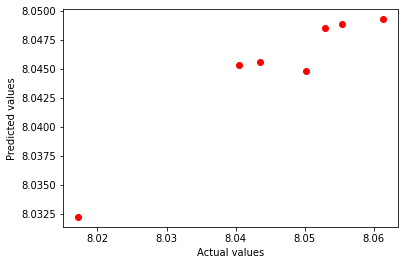

In [ ]:
plt.plot(ytest, yPredictKNN, 'ro')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

## **Decision Tree Regressor**

In [ ]:
# criterion=squared_error (default), max_depth=3 random_state=42 (so that same results are produced every time)
tree = DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=42)

# fitting the tree
tree.fit(xTrainStd, ytrain)
yPred = tree.predict(xTestStd)

# CV score, mean, standard deviation, MAE, RMSE on test set
print("Statistics for Decision Tree Regressor:\n")
print("Best CV score:", tree.score(xTestStd,ytest))

# using K fold cross validation
tree_scores = cross_val_score(tree, xTrainStd, ytrain, cv = 5)

# results of Decision Tree
print("\nMean:", np.mean(tree_scores))
print("R2 score:", r2_score(ytest, yPred))
print("Stdev:", np.std(tree_scores))
print("MSE:", mean_squared_error(ytest, yPred))
print("RMSE:", mean_squared_error(ytest, yPred, squared = False))
print("MAE:", mean_absolute_error(ytest, yPred))

Statistics for Decision Tree Regressor:

Best CV score: 0.9278720312150993

Mean: 0.8204368685357812
R2 score: 0.9278720312150993
Stdev: 0.15747145093617834
MSE: 1.2887237823747685e-05
RMSE: 0.0035898799177336957
MAE: 0.0027099852790252654


## GridSearch CV with Decision Tree
We chose to optimize two hyperparameters: the depth of the tree and the criterion (squared_error, absolute_error). Our main goal is to determine whether a larger depth makes more accurate predictions on the test set without overfitting. Additionally, since the criteria evaluate each split in the tree, we wanted to see which splits would perform better on average. We decided to test squared_error and absolute_error, as they are the most common loss functions for supervised regression.

In [ ]:
# Using GridSearch CV
# Trained on a local machine with the following params:
params = {'max_depth': range(1, 100), 'criterion': ['squared_error']}
# (Stopped using absolute error as a criterion. Didn't improve scores, and made the training take waaaaaaaay longer)

# Then implemented the GridSearchCV:
tree = GridSearchCV(DecisionTreeRegressor(random_state = 1), params, n_jobs=-1, verbose=1, cv=5)
tree.fit(Xtrain, ytrain)

# Loading the already trained model
# tree = load('/content/drive/My Drive/Colab Notebooks/tree.joblib')

TypeError: ignored

In [ ]:
# results for Decision Tree using GridSearchCV
yPred = tree.predict(Xtest)
results = pd.DataFrame(tree.cv_results_)
print("Best estimator:", tree.best_estimator_)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("\nBest CV score for decision tree: ", tree.score(Xtest,ytest))
print("MSE for decision tree: ", mean_squared_error(ytest, yPred))
print("RMSE for decision tree: ", mean_squared_error(ytest, yPred, squared = False))
print("MAE for decision tree: ", mean_absolute_error(ytest, yPred))
print("R2 score for Decision Tree:", r2_score(ytest, yPred))
print(tree.best_estimator_)

display(results)

Best estimator: DecisionTreeRegressor(max_depth=11, random_state=1)

Best CV score for decision tree:  0.8956317218719824
MSE for decision tree:  10249.08641188426
RMSE for decision tree:  101.23777166593632
MAE for decision tree:  40.92945600176896
R2 score for Decision Tree: 0.8956317218719824
DecisionTreeRegressor(max_depth=11, random_state=1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009339,0.001045,0.000417,0.000063,squared_error,1,"{'criterion': 'squared_error', 'max_depth': 1}",0.513785,0.512614,0.506019,0.489985,0.505950,0.505670,0.008489,99
1,0.017397,0.004236,0.000376,0.000029,squared_error,2,"{'criterion': 'squared_error', 'max_depth': 2}",0.638696,0.631114,0.633103,0.617542,0.621111,0.628313,0.007829,98
2,0.022675,0.001270,0.000425,0.000030,squared_error,3,"{'criterion': 'squared_error', 'max_depth': 3}",0.709932,0.719498,0.719842,0.695891,0.706983,0.710429,0.008881,97
3,0.029569,0.001440,0.000494,0.000067,squared_error,4,"{'criterion': 'squared_error', 'max_depth': 4}",0.789880,0.806540,0.808984,0.774992,0.783016,0.792682,0.013206,96
4,0.039215,0.004790,0.000549,0.000218,squared_error,5,"{'criterion': 'squared_error', 'max_depth': 5}",0.826959,0.833113,0.829394,0.816361,0.827721,0.826710,0.005593,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.123129,0.007844,0.001412,0.000056,squared_error,95,"{'criterion': 'squared_error', 'max_depth': 95}",0.871810,0.884141,0.869773,0.854107,0.886118,0.873190,0.011531,31
95,0.122816,0.009186,0.001839,0.001037,squared_error,96,"{'criterion': 'squared_error', 'max_depth': 96}",0.871810,0.884141,0.869773,0.854107,0.886118,0.873190,0.011531,31
96,0.119926,0.005316,0.001585,0.000566,squared_error,97,"{'criterion': 'squared_error', 'max_depth': 97}",0.871810,0.884141,0.869773,0.854107,0.886118,0.873190,0.011531,31
97,0.118875,0.002406,0.001451,0.000131,squared_error,98,"{'criterion': 'squared_error', 'max_depth': 98}",0.871810,0.884141,0.869773,0.854107,0.886118,0.873190,0.011531,31


The cross validation score is 0.896 using a Decision Tree model. The mean and standard deviation are displayed in the chart above. The MAE and MSE results are shown above. The first 3 rows test MSE and the last 3 rows test MAE.

Text(0, 0.5, 'Predicted values')

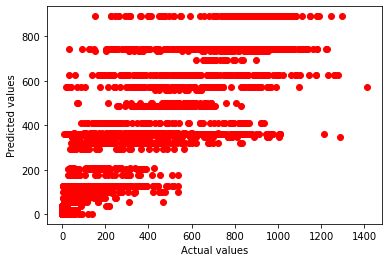

In [ ]:
plt.plot(ytest, yPred, 'ro')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

## **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Trained using an arbitrary n_estimators number (100) to test the model's general accuracy. 
# Also used the optimzed max depth from the decision tree grid search done above
# Trained this tree on a local runtime using the syntax below:
forest1 = RandomForestRegressor(n_estimators = 100, criterion = "squared_error", max_depth = 11)

# fitting the forest
forest1.fit(Xtrain, ytrain)
yPredForest = forest1.predict(Xtest)

# using K fold cross validation
#forest_scores = cross_val_score(forest, xAll, y, cv=5, n_jobs=-1)

# results of Random Forest
print("\nStatistics for Random Forest:\n")

#print("Mean score:", np.mean(forest_scores))
#print("Standard Deviation:", np.std(forest_scores))
print("MSE:", mean_squared_error(ytest, yPredForest))
print("RMSE:", mean_squared_error(ytest, yPredForest, squared = False))
print("MAE:", mean_absolute_error(ytest, yPredForest))

<ipython-input-57-41c8981ec27c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest1.fit(Xtrain, ytrain)



Statistics for Random Forest:

MSE: 1.9988283818791883e-05
RMSE: 0.0044708258542233426
MAE: 0.0032338102796504336


In [ ]:
# accuracy score for Random Forest
print("R2 score for Random Forest:", r2_score(ytest, yPredForest))

R2 score for Random Forest: 0.8881285244314443


## GridSearch CV with Random Forest
*   We chose to optimize n_estimators and critertion for the Random Forest Regressor. We left the max depth as 5, as this depth performed the best on our individual Decision tree model above, and using a higher depth may lead to overfitting. 
*   The number of estimators indicates how many trees we would like to use when training our Random Forest model. We chose to try 1, 2, and 5 to compare a single decision tree with multiple. 
*   The criteria will allow us to determine which splitting methods work best for the the Random Forest, since splits will be evaluated based upon these criteria.

In [ ]:
# create Random Forest using GridSearchCV. Also did this on a local runtime to improve performance.
# Initially used the following params:
# params = {'n_estimators' : range(200, 300, 10), 'criterion' : ['squared_error'], 'max_depth' : [11]}
# But then tried running it w/o a set max depth and got better performance, so used these params:
params = {'n_estimators' : range(200, 300, 10), 'criterion' : ['squared_error']}
forest = GridSearchCV(RandomForestRegressor(random_state=42), params, n_jobs = -1, verbose = 1, cv = 5)

# forestSetDepth = load('/content/drive/My Drive/Colab Notebooks/forestSetDepth.joblib')
# forest = load('/content/drive/My Drive/Colab Notebooks/forest.joblib')

TypeError: ignored

In [ ]:
# find the best estimator, find scores for forest
yPredForest = forest.predict(Xtest)
#print("Mean:", np.mean(forest_scores))
#print("Standard Deviation:", np.std(forest_scores))
print("MSE:", mean_squared_error(ytest, yPredForest))
print("RMSE:", mean_squared_error(ytest, yPredForest, squared = False))
print("MAE:", mean_absolute_error(ytest, yPredForest))
print("Best estimator:", forest.best_estimator_)
print("R2 score for Random Forest:", r2_score(ytest, yPredForest))
featureImportancepd = pd.DataFrame(forest.best_estimator_.feature_importances_, labels)
display(featureImportancepd)

MSE: 6563.455218186909
RMSE: 81.01515425021981
MAE: 30.53867618659051
Best estimator: RandomForestRegressor(n_estimators=270, random_state=42)
R2 score for Random Forest: 0.9331631628260824


,0
Temperature,0.566743
Pressure,0.014941
Humidity,0.041541
WindDirection,0.017668
Speed,0.007934
DayLength,0.016871
TimeofDay,0.306896
DayOfYear,0.025518
MonthOfYear,0.001887


In [ ]:
# CV scores for Random Forest using GridSearchCV
scores = cross_val_score(forest, xAll, y, cv=5, n_jobs=-1)
print("CV Scores for Random Forest:\n")
print(scores)

KeyboardInterrupt: ignored

Text(0, 0.5, 'Predicted values')

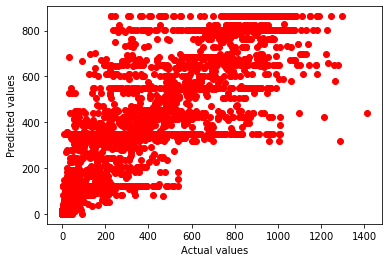

In [ ]:
plt.plot(ytest, yPredForest, 'ro')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
# evaluate model
cv = KFold(n_splits=5, random_state=42, shuffle=True)
# CALL sorted(sklearn.metrics.SCORERS.keys()) TO GET OPTIONS
# a few options are: 'neg_mean_absolute_error', 'neg_root_mean_squared_error', 'neg_mean_squared_error', 'recall'
#scoresMAE = cross_val_score(forest, xAll, y, cv=5, scoring = 'neg_mean_absolute_error', n_jobs=-1)

In [ ]:
# making neg_mean_absolute_error positive by multiplying each number in the array by -1
#scoresMAE = scoresMAE * -1
print("Scores for MAE:\n")
#print(scoresMAE)
# resulting scores = [77.07145845 66.55697704 68.96467717 53.36247861 79.69970184]

Scores for MAE:



In [ ]:
print("Best CV score for random forest:", forest.best_score_)

Best CV score for random forest: 0.8457919476510158


In [ ]:
#scoresRMSE = cross_val_score(forest, xAll, y, cv=5, scoring = 'neg_root_mean_squared_error', n_jobs=-1)
print("Scores for RMSE:\n")
#scoresRMSE = scoresRMSE * -1
#print(scoresRMSE)
# RMSE scores: [152.12831916 133.93556824 137.42444221 108.44742829 145.69536934]

Scores for RMSE:



The Random Forest Regressor performs best because it creates multiple sample variations on the same dataset in order to achieve higher train/ test accuracy. Although a Decision Tree is a strong model to use, it does not perform as well as a Random Forest (RF), as RFs are composed of a collection of randomized Decision Trees. Random Forests use a method called feature bagging which decreases redundant correlation between trees, increasing overall model accuracy. Feature bagging randomly selects a subset of features at each split in each individual Decision Tree to avoid strong predictive features that lead to similar splits between trees. This is a strong reason for why the Random Forest Regressor performed better than the Decision Tree Regressor.

**By comparing the CV scores, it seems that RF is actually a better predictor than both KNN and DT**

## Most Important Feature

## Additional Analysis

# Principal Component Analysis (PCA)
## Perform dimensionality reduction using PCA. Can a more accurate or efficient model be created using these features?

In [ ]:
from sklearn.decomposition import PCA

# apply PCA and transform the standardized dataset
pca = PCA()
XtrainPCA = pca.fit_transform(xTrainStd)
XtestPCA = pca.fit_transform(xTestStd)

# print explained variance of each PC
variance = pca.explained_variance_ratio_
print("Variance of each PC:", variance)
XtrainPCA.shape

Variance of each PC: [5.27987470e-01 2.13476206e-01 1.74889775e-01 7.92205219e-02
 4.41472491e-03 1.13022997e-05 1.12344186e-34]


(25, 9)

In [ ]:
# checking that the sum of each variance is 1
print("Sum of variance:", np.sum(variance))

varianceDF = pd.DataFrame(variance)
display(varianceDF)

Sum of variance: 1.0


,0
0,5.279875e-01
1,2.134762e-01
2,1.748898e-01
3,7.922052e-02
4,4.414725e-03
5,1.130230e-05
6,1.123442e-34


As seen in the table above, the first 4 PC features have the highest importances. We will use these first 4 features to retrain the models to see if they have higher accuracy using these features.

In [ ]:
# #PCA on KNN with 4 Features
# pca = PCA(n_components=9)
# x_train_PCA = pca.fit_transform(xTrainStd)
# x_test_PCA = pca.transform(xTestStd)


# scaler = StandardScaler()
# scaler.fit(ytrain)
# ytrainStd = scaler.transform(ytrain)
# ytestStd = scaler.transform(ytest)

# knn_PCA = KNeighborsRegressor(n_neighbors = 20)

# knn_PCA.fit(x_train_PCA, ytrainStd)
# yPred_KNN_PCA = knn_PCA.predict(x_test_PCA)

# print("Accuracy score for KNN w/ PCA:", r2_score(ytestStd, yPred_KNN_PCA))

Accuracy score for KNN w/ PCA: 0.1597689590935385


In [ ]:
# #PCA on KNN with 9 features (original featuers)
# pca2 = PCA(n_components=9)
# x_train_PCA = pca2.fit_transform(xTrainStd)
# x_test_PCA = pca2.transform(xTestStd)

# knn_PCA_2 = KNeighborsRegressor(n_neighbors = 20)

# knn_PCA_2.fit(x_train_PCA, ytrainStd)
# yPred_KNN_PCA = knn_PCA_2.predict(x_test_PCA)

# print("Accuracy score for KNN w/ PCA:", r2_score(ytestStd, yPred_KNN_PCA))

Accuracy score for KNN w/ PCA: 0.8607966048389297


As shown in the two examples above, the KNN model performs better with the original 9 features than with the 4 Principal Components. While some decrease in accuracy score could be justified by a faster runtime or higher efficiency, the KNN model is already quite efficient with the original features, so we decided from this analysis that PCA is not necessary for improving the KNN model.

In [ ]:
pca = PCA(n_components=9)
x_train_PCA = pca.fit_transform(xTrainStd)
x_test_PCA = pca.transform(xTestStd)

scaler = StandardScaler()
scaler.fit(ytrain)
ytrainStd = scaler.transform(ytrain)
ytestStd = scaler.transform(ytest)

treePCA = DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=42)

# fitting the tree
treePCA.fit(x_train_PCA, ytrainStd)
yPredPCA = treePCA.predict(x_test_PCA)

print("Accuracy score for Decision Tree w/ PCA:", r2_score(ytestStd, yPredPCA))

Accuracy score for Decision Tree w/ PCA: 0.7735599244331799


As shown in the code above, there is some error with using PCA for our Decision Tree regressor since the accuracy score declined sharply even when using the original 9 features. After discussing this issue with Professor Goldsmith, we determined to not consider PCA as a valid approach to improving the Decision Tree model. 

# Train each of the 3 models using only the top 4 features. How does this affect the performance of the models?

Creating a new dataframe and array with only the top 4 features as determined by the random forest.

In [ ]:
dfSelected = df[['PRESSURE_DB_CALCULATED', 'DEPTH_METER', 'SALINITY_PSS78_BOTTLE', 'DIC_UMOL_KG', 'PCO2_UATM_CALCULATED']]

xSelect = dfSelected.to_numpy()

xTrainSelect, xTestSelect, yTrainSelect, yTestSelect = train_test_split(xSelect, y, test_size=0.2, random_state=42)

scaler.fit(xSelect)
xTrainSelect = scaler.transform(xTrainSelect)
xTestSelect = scaler.transform(xTestSelect)

##KNN model trained on these selected features

In [ ]:
# Code used to train model:
params = {'n_neighbors': np.arange(1, 50)}

knnSelect= GridSearchCV(KNeighborsRegressor(), params, cv = 5)
knnSelect.fit(xTrainSelect, yTrainSelect)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 722, in score
    y_pred = self.predict(X)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_regression.py", line 236, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_base.py", line 810, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_sampl

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
yPredictKNN = knnSelect.predict(xTestSelect)

print("Optimal hyperparameters:",knnSelect.best_params_)
print("KNN best CV score: ", knnSelect.best_score_)
print("MAE using KNN: ", mean_absolute_error(yTestSelect, yPredictKNN))
print("RMSE using KNN: ", mean_squared_error(yTestSelect, yPredictKNN, squared=False))
print("Accuracy score for KNN:", r2_score(yTestSelect, yPredictKNN))

Optimal hyperparameters: {'n_neighbors': 1}
KNN best CV score:  0.2605526342738462
MAE using KNN:  0.0023059349474200885
RMSE using KNN:  0.0028553432715776967
Accuracy score for KNN: 0.9543689446918789


## Decision Tree Model trained on the selected features

In [ ]:
# Code used to train model
params = {'max_depth': range(1, 100), 'criterion': ['squared_error']}

treeSelect = GridSearchCV(DecisionTreeRegressor(random_state=1), params, n_jobs = -1, verbose = True, cv = 5)
treeSelect.fit(xTrainSelect, yTrainSelect)

# # Loading trained model:

TypeError: ignored

In [ ]:
yPredictTree = treeSelect.predict(xTestSelect)

print("Optimal hyperparameters:",treeSelect.best_params_)
print("Best CV score: ", treeSelect.best_score_)
print("MAE: ", mean_absolute_error(yTestSelect, yPredictTree))
print("RMSE: ", mean_squared_error(yTestSelect, yPredictTree, squared=False))
print("Accuracy score:", r2_score(yTestSelect, yPredictTree))

Optimal hyperparameters: {'criterion': 'squared_error', 'max_depth': 12}
Best CV score:  0.9001770827566024
MAE:  38.680998377484926
RMSE:  99.50459208135256
Accuracy score: 0.899174679530788


## Random Forest Model trained on the selected features

This first random forest doesn't use a set depth for each estimator. Instead, it keeps adding layers until all the layers are pure.

In [ ]:
# Code used to train model:
params = {'n_estimators': range(200, 300, 5)}
forestSelect = GridSearchCV(RandomForestRegressor(criterion = 'squared_error'), params, cv = 5, n_jobs = -1, verbose = True)
forestSelect.fit(xTrainSelect, yTrainSelect)

TypeError: ignored

# Results

In [ ]:
yPredictForest = forestSelect.predict(xTestSelect)

print("Optimal hyperparameters:",forestSelect.best_params_)
print("Best CV score: ", forestSelect.best_score_)
print("MAE: ", mean_absolute_error(yTestSelect, yPredictForest))
print("RMSE: ", mean_squared_error(yTestSelect, yPredictForest, squared=False))
print("Accuracy score:", r2_score(yTestSelect, yPredictForest))

Optimal hyperparameters: {'n_estimators': 270}
Best CV score:  0.9358668062794996
MAE:  29.258358459132328
RMSE:  80.66892567242608
Accuracy score: 0.9337332135941301


This second random forest uses the ideal depth found by the decison tree grid search.

In [ ]:
yPredictForestSetDepth = forestSelectSetDepth.predict(xTestSelect)

print("Optimal hyperparameters:",forestSelectSetDepth.best_params_)
print("KNN best CV score: ", forestSelectSetDepth.best_score_)
print("MAE using KNN: ", mean_absolute_error(yTestSelect, yPredictForestSetDepth))
print("RMSE using KNN: ", mean_squared_error(yTestSelect, yPredictForestSetDepth, squared=False))
print("Accuracy score for KNN:", r2_score(yTestSelect, yPredictForestSetDepth))

In [ ]:
d = {'Model Trained' : ['KNN', 'Decision Tree', 'Random Forest'], 'Original Score' : [0.8741446057782785, 0.8956317218719824, 0.9331631628260824], 'Score w/ Selected Features' : [0.9188586989416837, 0.899174679530788, 0.9337332135941301]}
df = pd.DataFrame(data=d)
df

,Model Trained,Original Score,Score w/ Selected Features
0,KNN,0.874145,0.918859
1,Decision Tree,0.895632,0.899175
2,Random Forest,0.933163,0.933733


##As seen in the table above, the performance of all 3 improved when trained on selected features. This suggests that our method of selecting certain features in order to reduce complexity and remove noise was successful.

Identify resilient indexes, coral reef index. Run AI model on locations that are severly bleached - output: bleaching data (computer vision). Computer vision to count fish (+ species). Sunscreen - using AI to track oxibenzone + ... levels (output: sunscreen levels). Identifying runoff (input: nitrogen levels, output: % confidence that you will have algal bloom). 

Coral cover, disease relevance, coral recruitment (how much coral grows - pH), biodiversity = use to create coral reef index
pH --> coral recruitment (proportional relationship --> as pH goes down, growth goes down === more breakages) [show graph]
temperature --> coral bleaching

## SHOW POTENTIAL CORAL REEF CALCULATION HERE
**Future Implementation: Coral cover, disease relevance, biodiversity